In [1]:
import sys
sys.path.append("..")

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from utils.evaultation.score.metrics import get_mean_reciprocal_rank, get_mean_precision_k, get_mean_ndcg_k, get_mean_latency, get_median_latency, get_batch_latency
from utils.get_data_path import get_hnsw_path, get_data_path

In [4]:
from utils.load_data import load_parquet

In [5]:
### ALL HNSW Combinations
hnsw_m = [2**i for i in range(4, 10)]
hnsw_construct = [2**i for i in range(10)]
hnsw_search = [2**i for i in range(10)]

In [6]:
### Ground truth file path
gt_path = get_data_path("eval/gt/starbucks_vsm__type=gt.parquet")
gt_path

'c:\\Users\\user\\OneDrive\\Documents\\GitHub\\sc4020-project-1\\sc4020-project-1\\data\\eval\\gt\\starbucks_vsm__type=gt.parquet'

In [7]:
### Parent file var
parent_file = "2024-09-16_06-03-58"

### Generate Data DF

In [8]:
### Creating all combinations of construct and m

df_mp = pd.DataFrame({
    "m": [],
    "efConstruction": [],
    "efSearch": [],
    "mp_1": [],
    "mp_3": [],
    "mp_5": [],
    "mp_10": [],
    "mrr_1": [],
    "mrr_3": [],
    "mrr_5": [],
    "mrr_10": [],
    "ndcg_1": [],
    "ndcg_3": [],
    "ndcg_5": [],
    "ndcg_10": [],
    "latency": []
})

for x in hnsw_m:
    for y in hnsw_construct:
        for z in hnsw_search:
            path = get_hnsw_path("starbucks", parent_file, x, y, z) 
            df_mp.loc[len(df_mp)] = [
                x, y, z,
                get_mean_precision_k(gt_path, [path], 1, 10)[0],
                get_mean_precision_k(gt_path, [path], 3, 10)[0],
                get_mean_precision_k(gt_path, [path], 5, 10)[0],
                get_mean_precision_k(gt_path, [path], 10, 10)[0],
                get_mean_reciprocal_rank(gt_path, [path], 1)[0],
                get_mean_reciprocal_rank(gt_path, [path], 3)[0],
                get_mean_reciprocal_rank(gt_path, [path], 5)[0],
                get_mean_reciprocal_rank(gt_path, [path], 10)[0],
                get_mean_ndcg_k(gt_path, [path], 1)[0],
                get_mean_ndcg_k(gt_path, [path], 3)[0],
                get_mean_ndcg_k(gt_path, [path], 5)[0],
                get_mean_ndcg_k(gt_path, [path], 10)[0],
                get_mean_latency([path])[0]
            ]

In [9]:
df_mp

,m,efConstruction,efSearch,mp_1,mp_3,mp_5,mp_10,mrr_1,mrr_3,mrr_5,mrr_10,ndcg_1,ndcg_3,ndcg_5,ndcg_10,latency
0,16.0,1.0,1.0,0.68750,0.447917,0.30625,0.153125,0.15625,0.15625,0.15625,0.15625,0.15625,0.161798,0.189780,0.223577,9.65625
1,16.0,1.0,2.0,0.75000,0.489583,0.31875,0.159375,0.18750,0.18750,0.18750,0.18750,0.18750,0.173204,0.194367,0.231958,9.34375
2,16.0,1.0,4.0,0.87500,0.614583,0.45625,0.228125,0.28125,0.28125,0.28125,0.28125,0.28125,0.301486,0.315768,0.329658,9.93750
3,16.0,1.0,8.0,0.90625,0.718750,0.56250,0.303125,0.37500,0.37500,0.37500,0.37500,0.37500,0.371407,0.393914,0.411374,9.50000
4,16.0,1.0,16.0,0.93750,0.760417,0.60000,0.328125,0.43750,0.43750,0.43750,0.43750,0.43750,0.406642,0.425984,0.436330,9.65625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,512.0,512.0,32.0,1.00000,0.979167,0.97500,0.971875,1.00000,1.00000,1.00000,1.00000,1.00000,0.982734,0.977720,0.973488,10.06250
596,512.0,512.0,64.0,1.00000,0.979167,0.97500,0.971875,1.00000,1.00000,1.00000,1.00000,1.00000,0.982734,0.977720,0.973488,10.03125
597,512.0,512.0,128.0,1.00000,0.979167,0.97500,0.971875,1.00000,1.00000,1.00000,1.00000,1.00000,0.982734,0.977720,0.973488,10.37500
598,512.0,512.0,256.0,1.00000,0.979167,0.97500,0.971875,1.00000,1.00000,1.00000,1.00000,1.00000,0.982734,0.977720,0.973488,10.84375


# Mean Precision

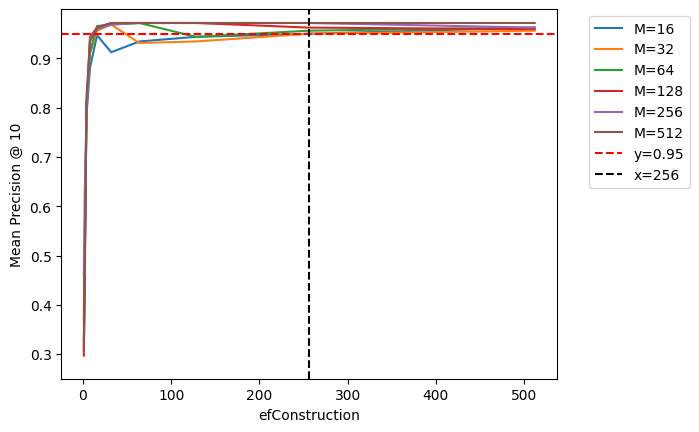

In [10]:
for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 16)]
    plt.plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")
    
plt.axhline(y=0.95, color='red', linestyle='--', label='y=0.95')
plt.axvline(x=256, color='black', linestyle='--', label='x=256')

plt.xlabel("efConstruction")
plt.ylabel("Mean Precision @ 10")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.0, 1, 0.1))
plt.ylim([0.25, 1])
plt.show()

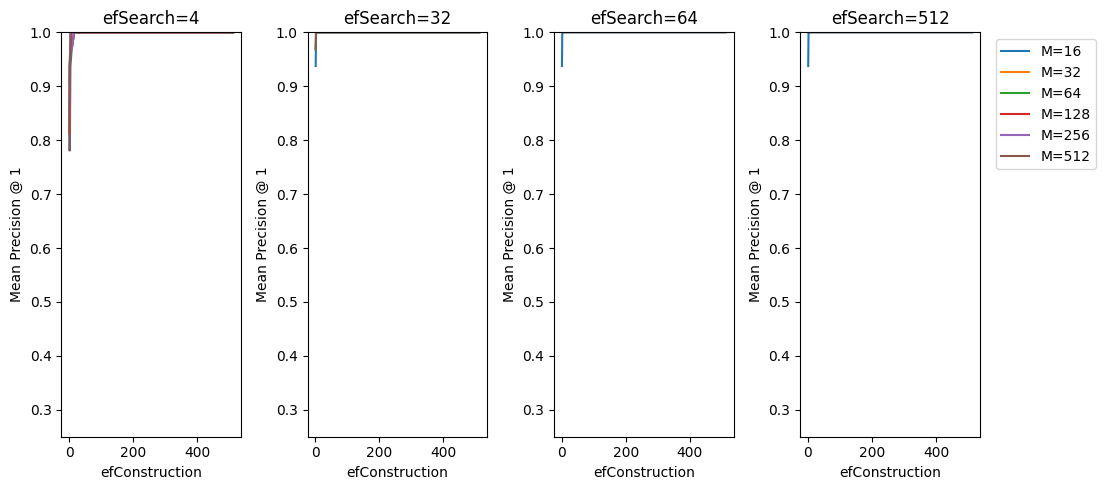

In [11]:
## mean precision @ 1
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mp_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mp_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mp_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mp_1'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Precision @ 1")
    a.set_ylim(0.25, 1)
    
ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")
    
plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

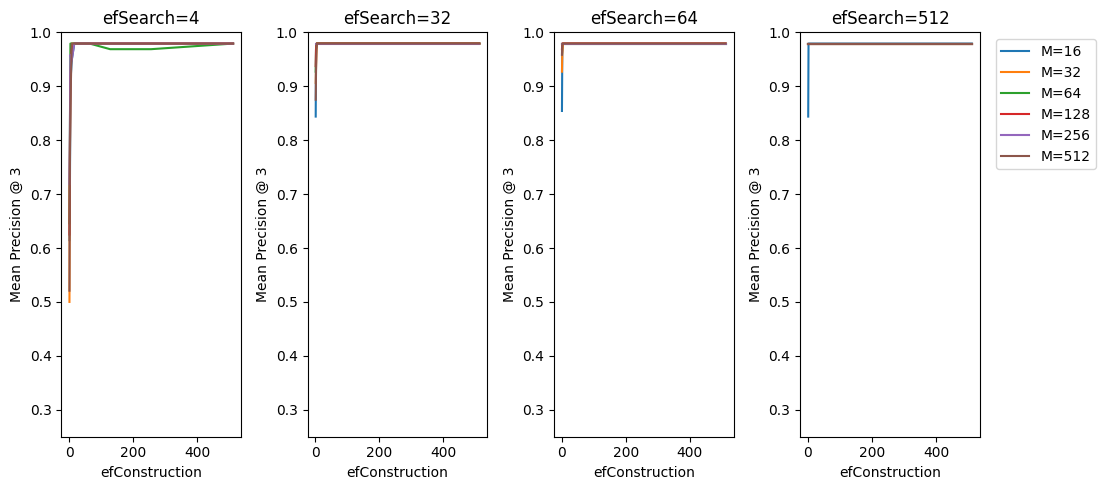

In [24]:
## mean precision @ 3
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mp_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mp_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mp_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mp_3'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Precision @ 3")
    a.set_ylim(0.25, 1)
    
ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")
    
plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

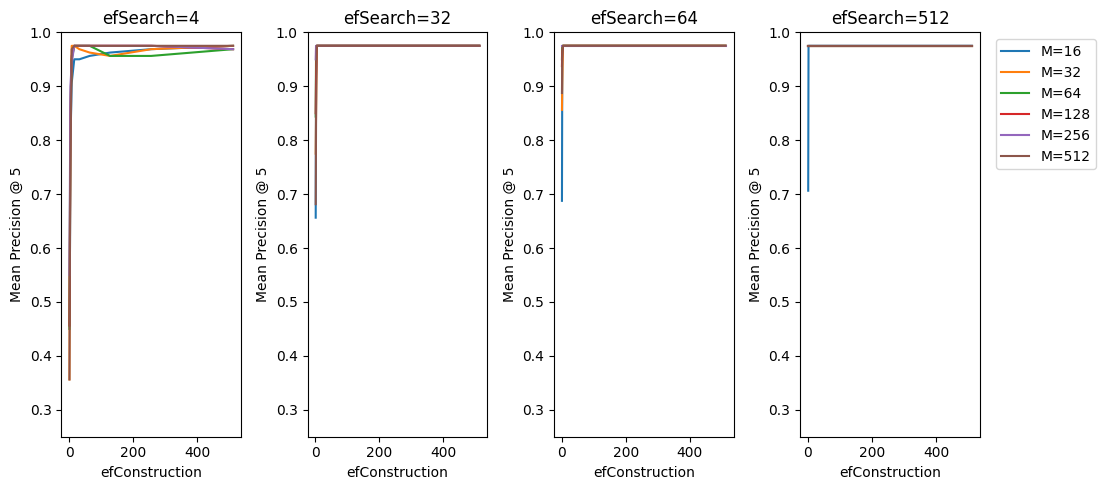

In [23]:
## mean precision @ 5
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mp_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mp_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mp_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mp_5'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Precision @ 5")
    a.set_ylim(0.25, 1)
    
ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")
    
plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

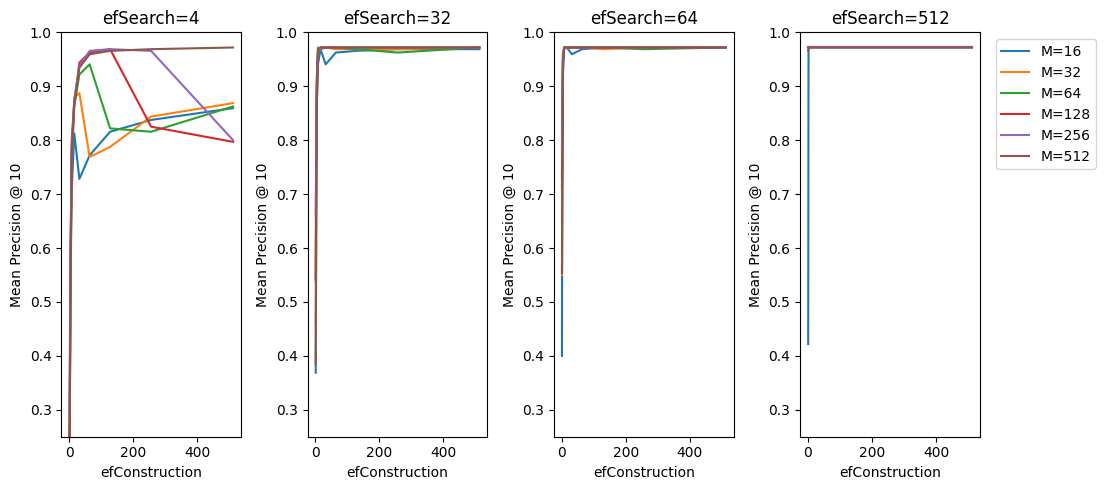

In [14]:
## mean precision @ 10
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Precision @ 10")
    a.set_ylim(0.25, 1)
    
ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")
    
plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

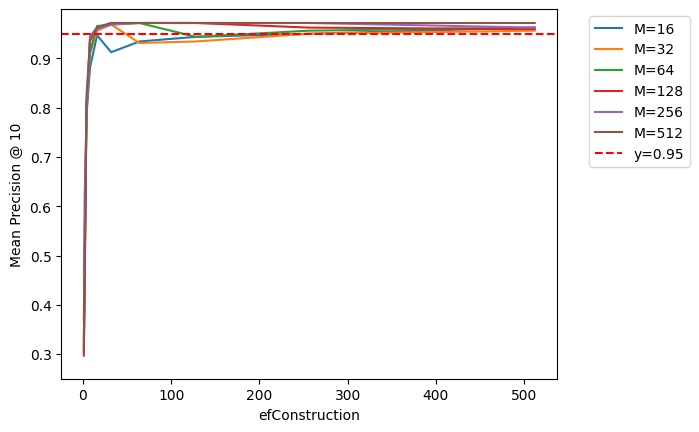

In [11]:
for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 16)]
    plt.plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

plt.axhline(y=0.95, color='red', linestyle='--', label='y=0.95')

plt.xlabel("efConstruction")
plt.ylabel("Mean Precision @ 10")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.0, 1, 0.1))
plt.ylim([0.25, 1])
plt.show()

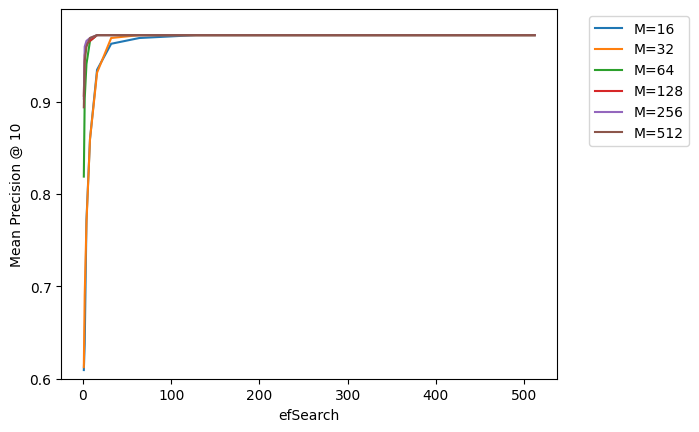

In [12]:
for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efConstruction == 64)]
    plt.plot(subset['efSearch'], subset['mp_10'], label=f"M={m_val}")

plt.xlabel("efSearch")
plt.ylabel("Mean Precision @ 10")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.0, 1, 0.1))
plt.ylim([0.6, 1])
plt.show()

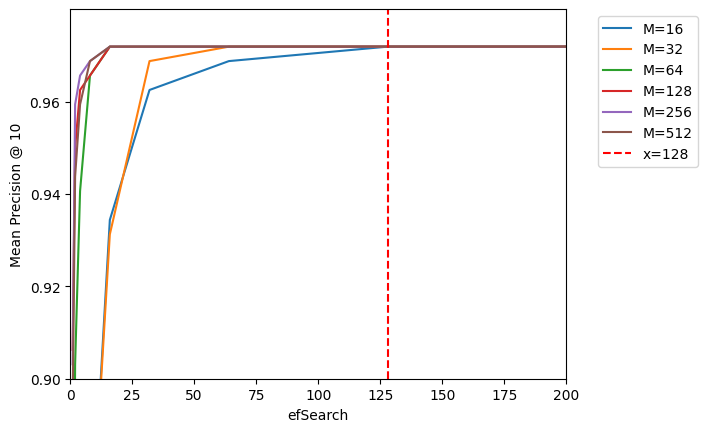

In [13]:
for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efConstruction == 64)]
    plt.plot(subset['efSearch'], subset['mp_10'], label=f"M={m_val}")

plt.xlabel("efSearch")
plt.ylabel("Mean Precision @ 10")

plt.axvline(x=128, color='red', linestyle='--', label='x=128')

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.0, 0.98, 0.02))
plt.ylim([0.9, 0.98])
plt.xlim([0, 200])
plt.show()

# Mean Reciprocal Rank

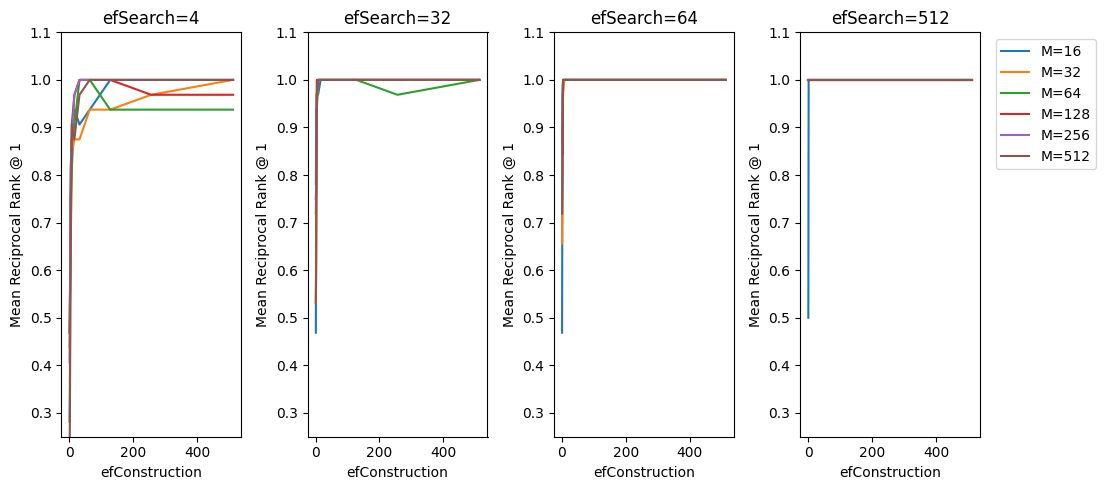

In [15]:
## mrr @ 1
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mrr_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mrr_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mrr_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mrr_1'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Reciprocal Rank @ 1")
    a.set_ylim(0.25, 1.1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

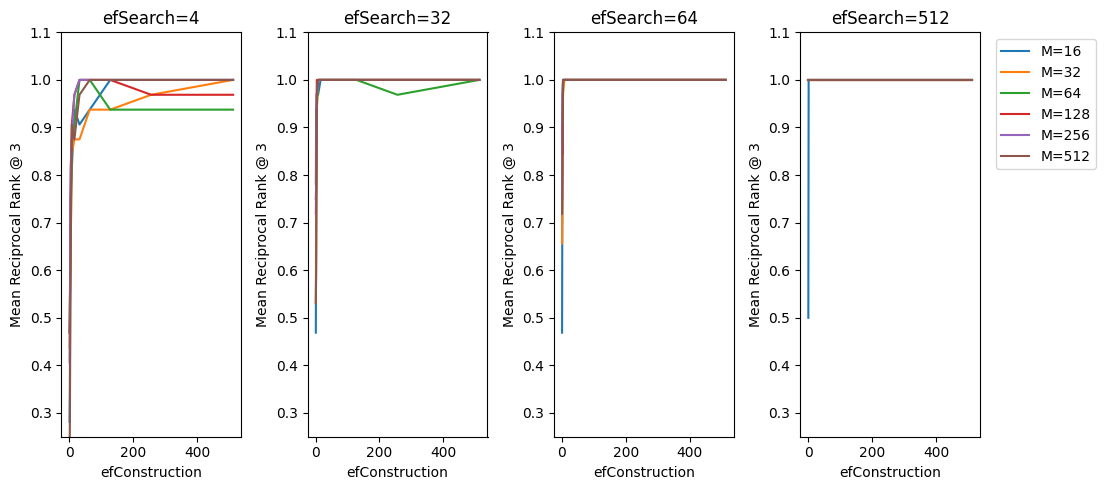

In [16]:
## mrr @ 3
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mrr_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mrr_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mrr_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mrr_3'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Reciprocal Rank @ 3")
    a.set_ylim(0.25, 1.1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

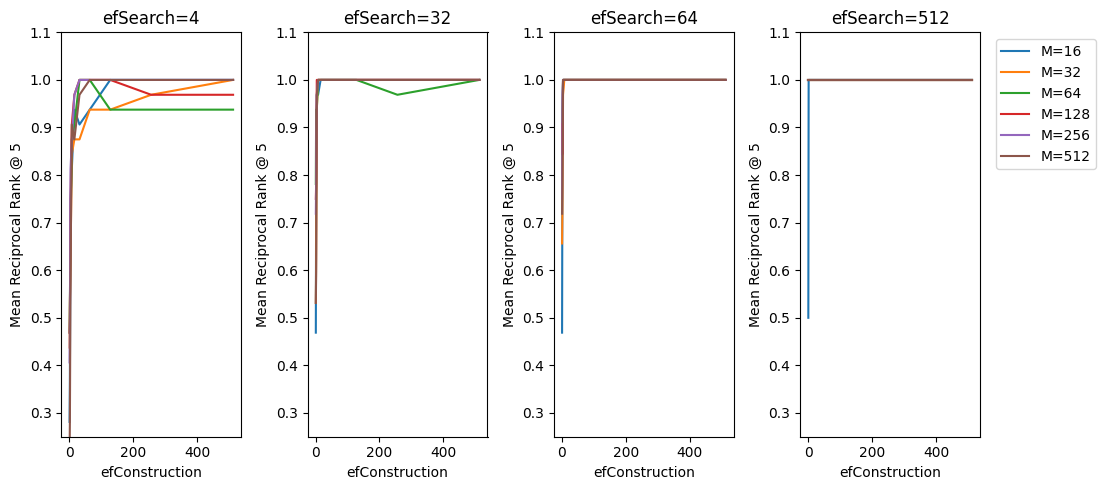

In [17]:
## mrr @ 5
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mrr_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mrr_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mrr_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mrr_5'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Reciprocal Rank @ 5")
    a.set_ylim(0.25, 1.1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

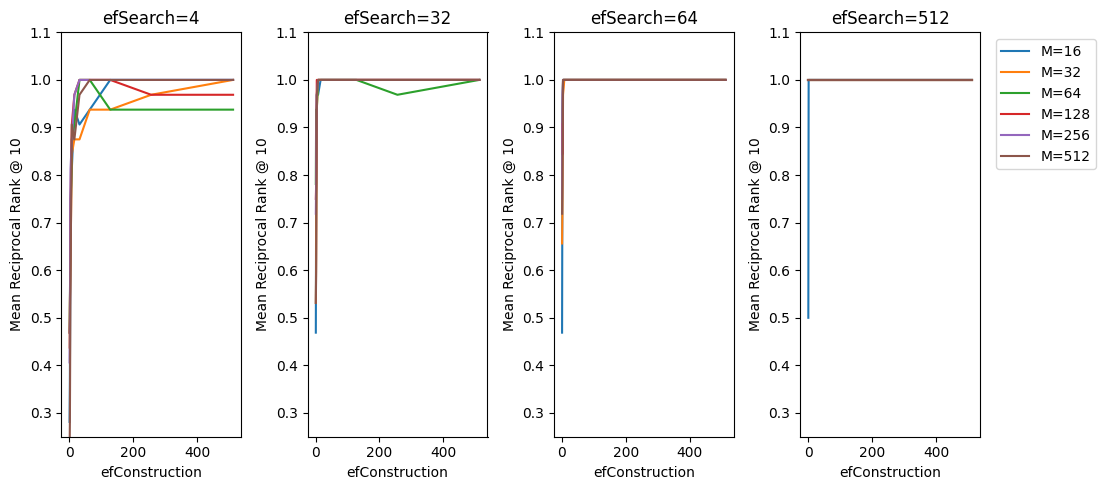

In [18]:
# mrr @ 10
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mrr_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mrr_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mrr_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mrr_10'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Reciprocal Rank @ 10")
    a.set_ylim(0.25, 1.1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# nDCG

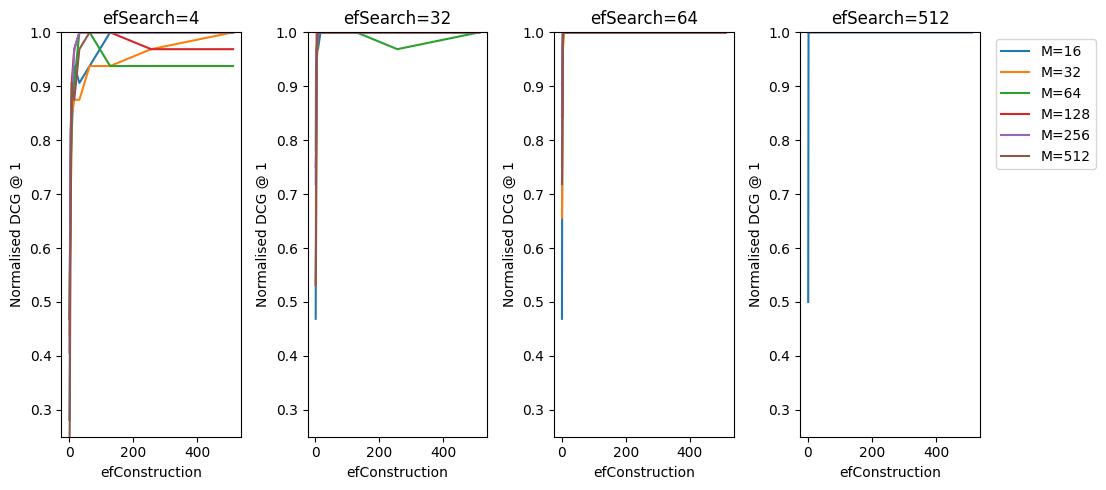

In [19]:
## ndcg @ 1
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['ndcg_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['ndcg_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['ndcg_1'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['ndcg_1'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Normalised DCG @ 1")
    a.set_ylim(0.25, 1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

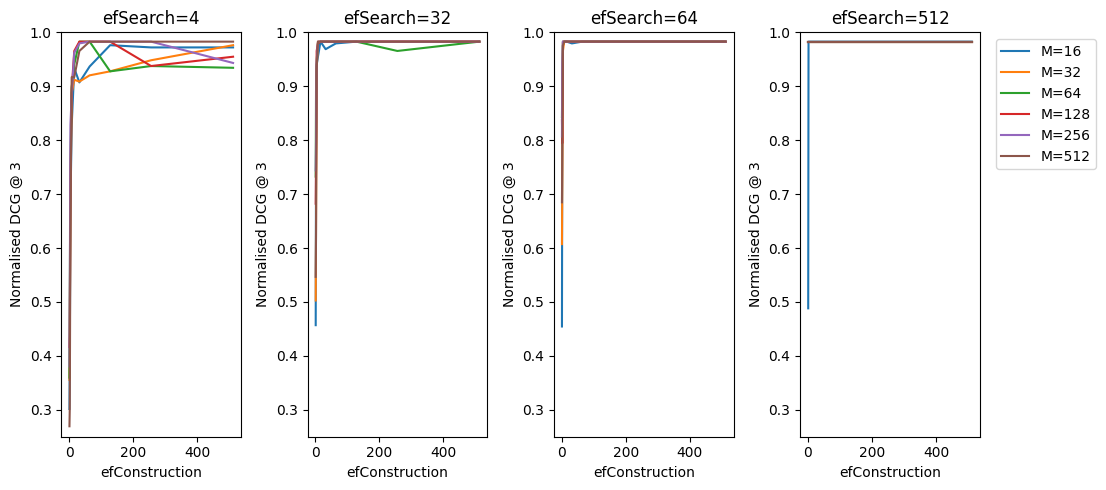

In [20]:
## ndcg @ 3
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['ndcg_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['ndcg_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['ndcg_3'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['ndcg_3'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Normalised DCG @ 3")
    a.set_ylim(0.25, 1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

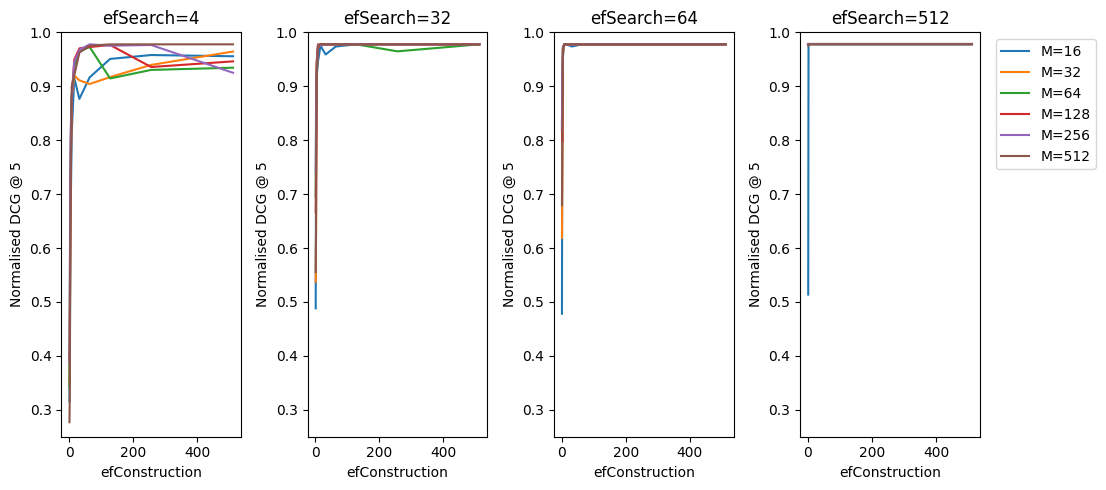

In [21]:
## ndcg @ 5
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['ndcg_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['ndcg_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['ndcg_5'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['ndcg_5'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Normalised DCG @ 5")
    a.set_ylim(0.25, 1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

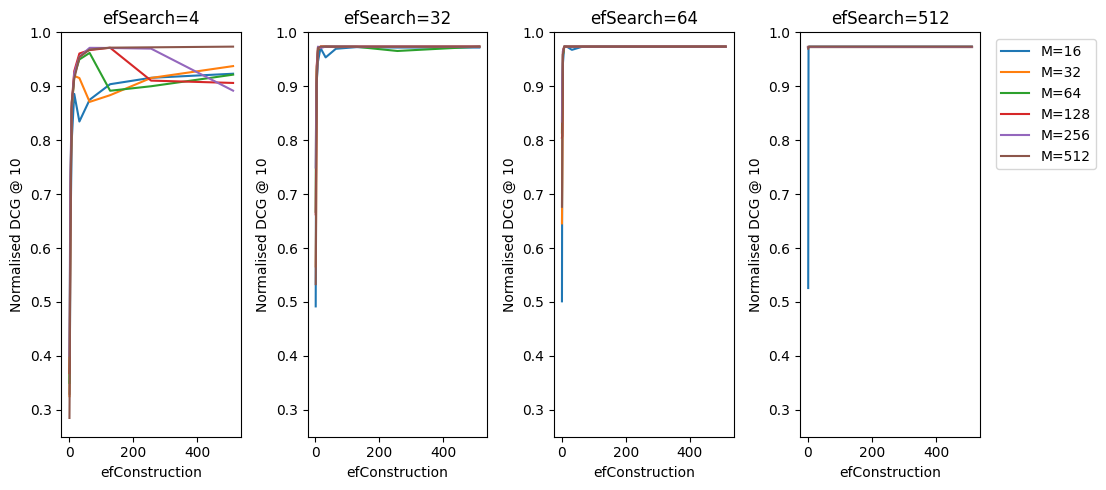

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['ndcg_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['ndcg_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['ndcg_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['ndcg_10'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Normalised DCG @ 10")
    a.set_ylim(0.25, 1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Latency

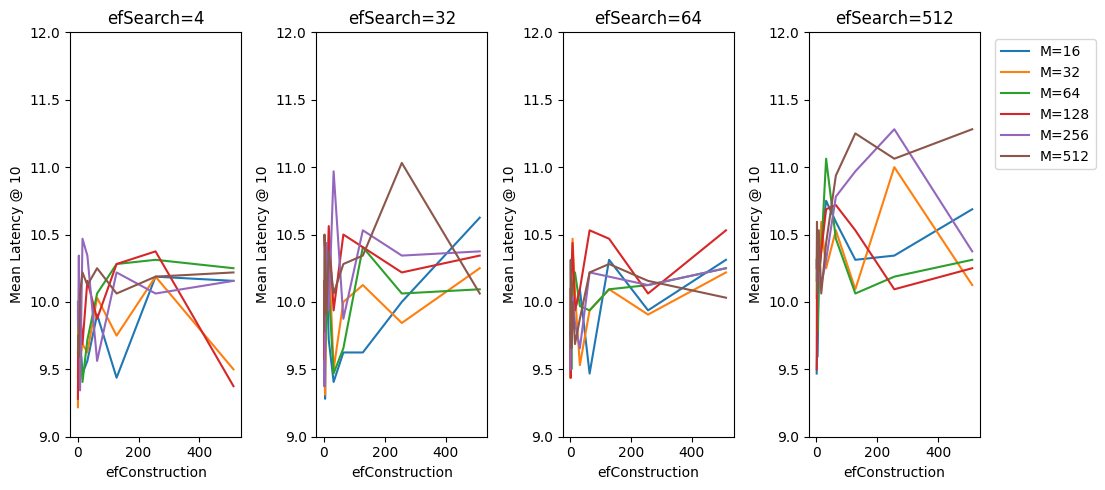

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Latency @ 10")
    a.set_ylim(9, 12)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

## Explore latency

In [7]:
### Creating all combinations of construct and m

df_mp_latency = pd.DataFrame({
    "m": [],
    "efConstruction": [],
    "efSearch": [],
    "meanLatency": [],
    "medianLatency": []
})

parent_file = "starbucks_hnsw_batch_efsearch512"

hnsw_m = [2**i for i in range(4, 10)]
hnsw_construct = [i for i in range(50, 501, 50)]
z = 512

for x in hnsw_m:
    for y in hnsw_construct:
        path = get_hnsw_path("starbucks", parent_file, x, y, z) 
        df_mp_latency.loc[len(df_mp_latency)] = [
            x, y, z,
            get_mean_latency([path])[0],
            get_median_latency([path])[0]

        ]

In [6]:
df_mp_latency.head()

,m,efConstruction,efSearch,meanLatency,medianLatency
0,16.0,50.0,512.0,44.0,44.0
1,16.0,100.0,512.0,53.0,53.0
2,16.0,150.0,512.0,50.0,50.0
3,16.0,200.0,512.0,69.0,69.0
4,16.0,250.0,512.0,53.0,53.0


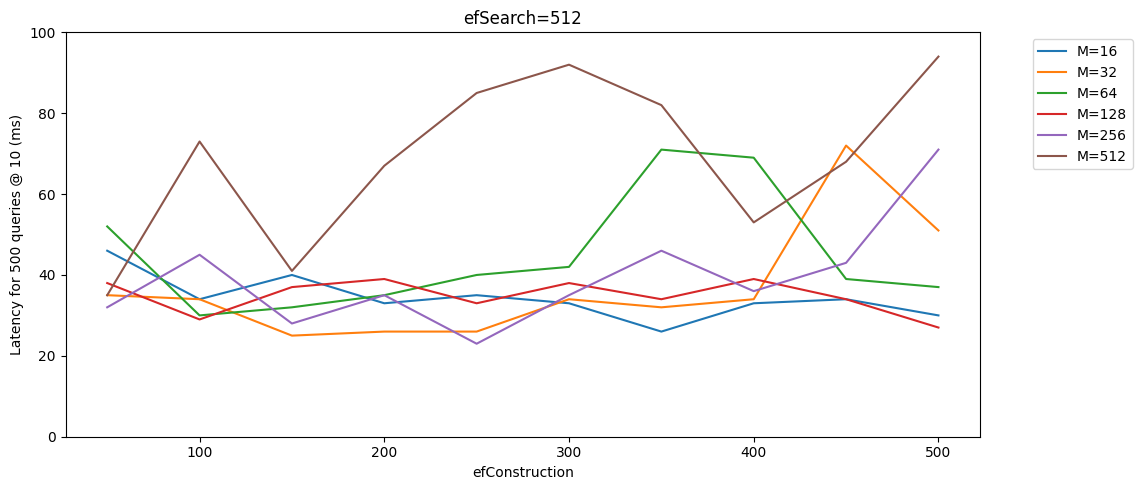

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for m_val in hnsw_m:
    subset = df_mp_latency[(df_mp_latency.m == m_val)]
    ax.plot(subset['efConstruction'], subset['meanLatency'], label=f"M={m_val}")

ax.set_xlabel("efConstruction")
ax.set_ylabel("Latency for 500 queries @ 10 (ms)")
ax.set_ylim(0, 100)

ax.set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### analyse batch latency for all combi of params

In [25]:
### Creating all combinations of construct and m

df_mp_latency_all = pd.DataFrame({
    "m": [],
    "efConstruction": [],
    "efSearch": [],
    "latency": []
})

parent_file = "starbucks_hnsw_batch_all_combi"

hnsw_m = [2**i for i in range(4, 10)]
hnsw_construct = [i for i in range(50, 501, 50)]
hnsw_search = [2**i for i in range(10)]

for x in hnsw_m:
    for y in hnsw_construct:
        for z in hnsw_search:
            path = get_hnsw_path("starbucks", parent_file, x, y, z) 
            df_mp_latency_all.loc[len(df_mp_latency_all)] = [
                x, y, z,
                get_batch_latency([path])[0]
            ]

In [26]:
df_mp_latency_all.head()

,m,efConstruction,efSearch,latency
0,16,50,1,1
1,16,50,2,0
2,16,50,4,2
3,16,50,8,3
4,16,50,16,16


In [27]:
df_mp_latency_all["latency"].min()

0

In [28]:
df_mp_latency_all["latency"].max()

395

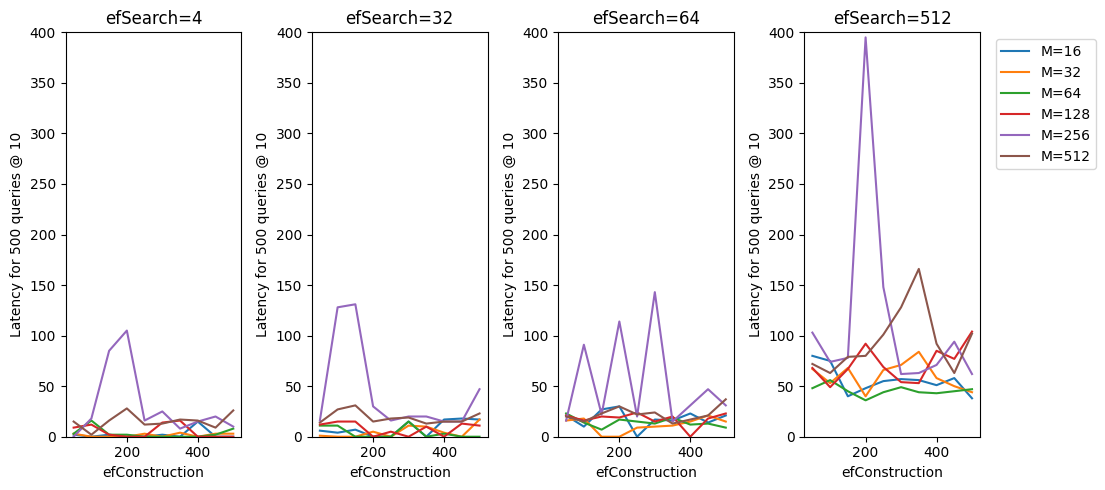

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp_latency_all[(df_mp_latency_all.m == m_val) & (df_mp_latency_all.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp_latency_all[(df_mp_latency_all.m == m_val) & (df_mp_latency_all.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp_latency_all[(df_mp_latency_all.m == m_val) & (df_mp_latency_all.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp_latency_all[(df_mp_latency_all.m == m_val) & (df_mp_latency_all.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Latency for 500 queries @ 10")
    a.set_ylim(0, 400)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Memory Usage

In [40]:
import os

In [41]:
df_mem_dict = {
    "m": [],
    "efConstruction": [],
    "efSearch": [],
    "memory": []
}
for m in hnsw_m:
    for c in hnsw_construct:
        for s in hnsw_search:
            file = f"../data/starbucks/indexing/hnsw_m={m}_c={c}_s={s}.index"
            # print(f"{os.path.getsize(file)}")
            df_mem_dict['m'].append(m)
            df_mem_dict['efConstruction'].append(c)
            df_mem_dict['efSearch'].append(s)
            df_mem_dict['memory'].append(os.path.getsize(file)/1_000_000)

df_mem = pd.DataFrame.from_dict(df_mem_dict)
df_mem.head()

,m,efConstruction,efSearch,memory
0,16,1,1,3.603858
1,16,1,2,3.603858
2,16,1,4,3.603858
3,16,1,8,3.603858
4,16,1,16,3.603858


In [42]:
df_mem["memory"].min()

3.603858

In [43]:
df_mem["memory"].max()


6.977698

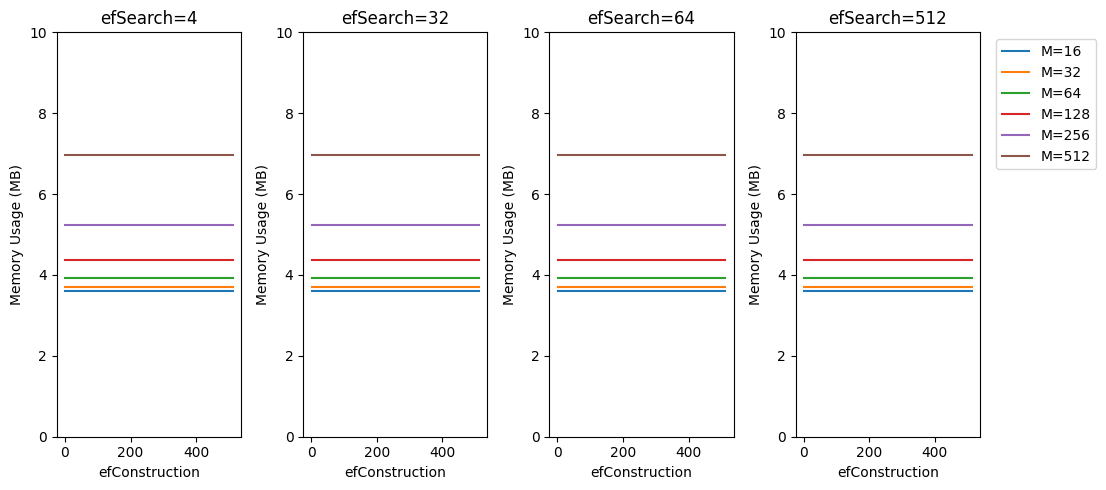

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mem[(df_mem.m == m_val) & (df_mem.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['memory'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mem[(df_mem.m == m_val) & (df_mem.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['memory'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mem[(df_mem.m == m_val) & (df_mem.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['memory'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mem[(df_mem.m == m_val) & (df_mem.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['memory'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Memory Usage (MB)")
    a.set_ylim(0, 10)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

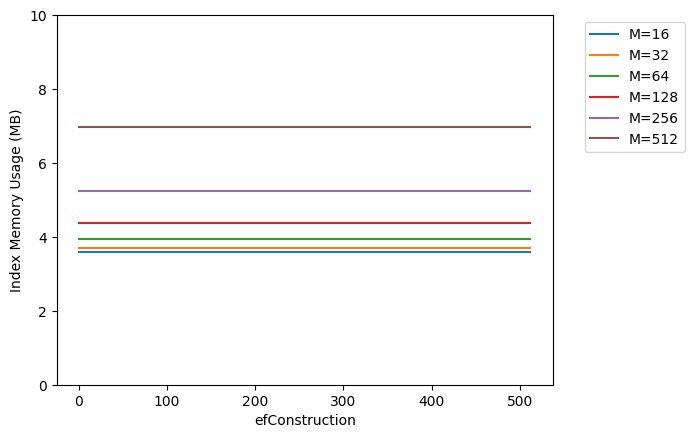

In [12]:
for m_val in hnsw_m:
    subset = df_mem[(df_mem.m == m_val)]
    plt.plot(subset['efConstruction'], subset['memory'], label=f"M={m_val}")

plt.xlabel("efConstruction")
plt.ylabel("Index Memory Usage (MB)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, 10)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24832\753261036.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


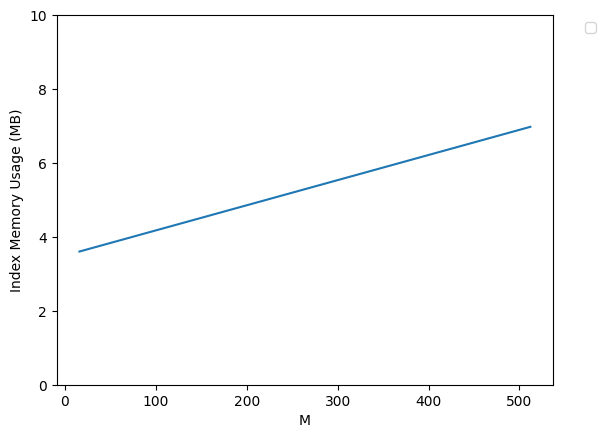

In [14]:
plt.plot(df_mem['m'], df_mem['memory'])

plt.xlabel("M")
plt.ylabel("Index Memory Usage (MB)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, 10)
plt.show()

## Index construction time

In [16]:
dataset = "starbucks"
construction_file = f"../data/{dataset}/indexing/hnsw_construction.parquet"
construction_df = load_parquet(construction_file)

construction_df.head()

,m,efConstruction,efSearch,time_taken
0,16,1,1,7870100
1,16,1,2,10519500
2,16,1,4,18103000
3,16,1,8,5159000
4,16,1,16,5735500


In [26]:
avg_construction_df = construction_df[["m", "efConstruction"]].drop_duplicates()

avg_construction_df.head()

,m,efConstruction
0,16,1
10,16,2
20,16,4
30,16,8
40,16,16


In [27]:
avg_time_list = []
for i,row in avg_construction_df.iterrows():
    avg_time_taken = construction_df[(construction_df["m"]== row["m"]) & (construction_df["efConstruction"]==row["efConstruction"])]['time_taken'].mean()
    avg_time_list.append(avg_time_taken)

avg_construction_df["avg_time_taken"]=avg_time_list
avg_construction_df.head()

,m,efConstruction,avg_time_taken
0,16,1,7.779589e+06
10,16,2,1.072940e+07
20,16,4,1.879447e+07
30,16,8,2.834915e+07
40,16,16,4.226365e+07


In [29]:
avg_construction_df['avg_time_taken_ms'] = avg_construction_df['avg_time_taken'].apply(lambda x: round(x/1_000_000, 3))

avg_construction_df.head()

,m,efConstruction,avg_time_taken,avg_time_taken_ms
0,16,1,7.779589e+06,7.780
10,16,2,1.072940e+07,10.729
20,16,4,1.879447e+07,18.794
30,16,8,2.834915e+07,28.349
40,16,16,4.226365e+07,42.264


In [30]:
avg_construction_df['avg_time_taken_ms'].max()

142.376

C:\Users\user\AppData\Local\Temp\ipykernel_24832\2739758237.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = avg_construction_df[(df_mem.m == m_val)]
C:\Users\user\AppData\Local\Temp\ipykernel_24832\2739758237.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = avg_construction_df[(df_mem.m == m_val)]
C:\Users\user\AppData\Local\Temp\ipykernel_24832\2739758237.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = avg_construction_df[(df_mem.m == m_val)]
C:\Users\user\AppData\Local\Temp\ipykernel_24832\2739758237.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = avg_construction_df[(df_mem.m == m_val)]
C:\Users\user\AppData\Local\Temp\ipykernel_24832\2739758237.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = avg_construction_df[(df_mem.m == m_val)]
C:\Users\user\AppData\Local\Te

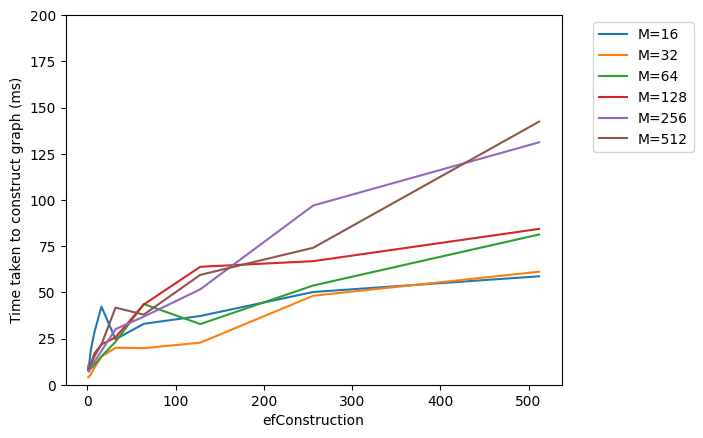

In [31]:
# note that efsearch does not have an effect on time taken
for m_val in hnsw_m:
    subset = avg_construction_df[(df_mem.m == m_val)]
    plt.plot(subset['efConstruction'], subset['avg_time_taken_ms'], label=f"M={m_val}")

plt.xlabel("efConstruction")
plt.ylabel("Time taken to construct graph (ms)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, 200)
plt.show()